# Case Study on Student performance

Input data="StudentsPerformance.csv"
The file contains performance of 1000 students and details like 'gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course', 'math score', 'reading score' and'writing score'.


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df= pd.read_csv('G:\my trials\StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


##### Find out how many males and females participated in the test.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [55]:
df1=df[df['gender']=='male']
print('Number of Males participated in the test is\n',df1.gender.count())

Number of Males participated in the test is
 482


In [56]:
df2=df[df['gender']=='female']
print('Number of Females participated in the test is\n',df2.gender.count())

Number of Females participated in the test is
 518


##### What do you think about the students' parental level of education?

In [57]:
df1=df['parental level of education'].value_counts().to_frame().reset_index()
df1

,index,parental level of education
0,some college,226
1,associate's degree,222
2,high school,196
3,some high school,179
4,bachelor's degree,118
5,master's degree,59


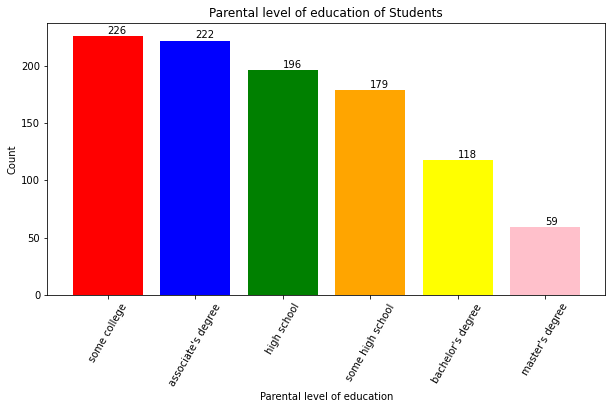

In [60]:
plt.figure(figsize=(10,5))
plt.bar(df1['index'],df1['parental level of education'],color = ['red','blue','green','orange','yellow','pink'])
plt.title('Parental level of education of Students')
plt.xlabel('Parental level of education')
plt.ylabel('Count')
plt.xticks(rotation=60)
for i,j in zip(df1['index'],round(df1['parental level of education'],2)):
 plt.annotate(str(j),(i,j+2))

##### Who scores the most on average for math, reading and writing based on


### Gender

In [77]:
df2=df.groupby('gender')[['math score','reading score','writing score']].mean()
df2 = df2.reset_index()
df2


,gender,math score,reading score,writing score
0,female,63.376448,72.590734,72.467181
1,male,68.821577,65.545643,63.446058


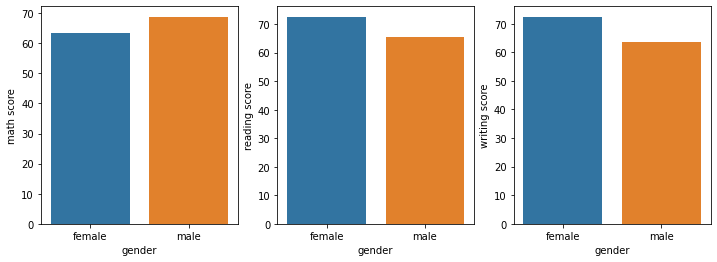

In [81]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
graph_1 = sns.barplot(x='gender', y='math score', data=df2)
plt.subplot(1, 3, 2)
graph_1 = sns.barplot(x='gender', y='reading score', data=df2)
plt.subplot(1, 3, 3)
graph_1 = sns.barplot(x='gender', y='writing score', data=df2)

### Test preparation course

In [62]:
df2=df.groupby('test preparation course')[['math score','reading score','writing score']].mean()
df2 = df2.reset_index()
df2

,test preparation course,math score,reading score,writing score
0,completed,69.96648,74.175978,74.684358
1,none,63.78972,66.417445,64.457944


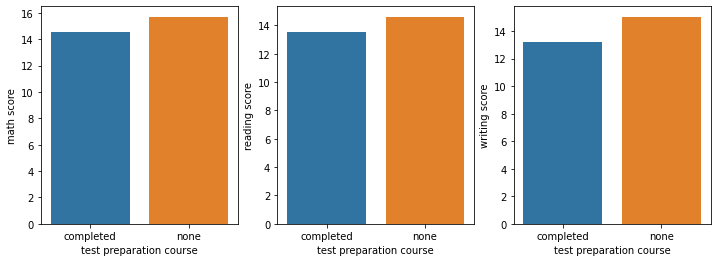

In [75]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
graph_1 = sns.barplot(x='test preparation course', y='math score', data=df2)
plt.subplot(1, 3, 2)
graph_1 = sns.barplot(x='test preparation course', y='reading score', data=df2)
plt.subplot(1, 3, 3)
graph_1 = sns.barplot(x='test preparation course', y='writing score', data=df2)

##### What do you think about the scoring variation for math, reading and writing based on
● Gender
● Test preparation course

In [63]:
df2=df.groupby('gender')[['math score','reading score','writing score']].std()
df2 = df2.reset_index()
df2

,gender,math score,reading score,writing score
0,female,16.029928,14.411018,14.844842
1,male,14.556411,14.149594,14.227225


In [64]:
df2=df.groupby('test preparation course')[['math score','reading score','writing score']].std()
df2 = df2.reset_index()
df2

,test preparation course,math score,reading score,writing score
0,completed,14.521847,13.537572,13.236412
1,none,15.705689,14.608896,15.041667


##### The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [65]:
# extracting the column of maths score
df1=df[df.columns[5]]
df1


0        0
1        8
2       18
3       11
4       22
      ... 
995     99
996    100
997    100
998    100
999    100
Name: math score, Length: 1000, dtype: int64

In [66]:
#To get top 25% of students based on their maths score
df1.quantile(0.75)

77.0

In [67]:
# students who score 77 or above get bonus of 10 marks
df_sorted=df.sort_values('math score',ascending=False)
df_bonus=df_sorted.loc[df_sorted['math score'] >= 77]
df_bonus.insert(8, 'Bonus', '10')
df_bonus

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Bonus
999,male,group E,bachelor's degree,standard,completed,100,100,100,10
996,male,group A,some college,standard,completed,100,96,86,10
515,female,group E,some college,standard,none,100,92,97,10
517,female,group E,associate's degree,standard,none,100,100,100,10
516,female,group E,bachelor's degree,standard,none,100,100,100,10
...,...,...,...,...,...,...,...,...,...
851,male,group D,some college,standard,completed,77,62,62,10
849,male,group A,bachelor's degree,standard,none,77,67,68,10
850,male,group C,associate's degree,free/reduced,none,77,67,64,10
421,female,group C,some college,free/reduced,none,77,90,91,10


In [68]:
# students who score below 77 don't get bonus of 10 marks
df_bonus_nil=df_sorted.loc[df_sorted['math score']  < 77]
df_bonus_nil
df_bonus_nil.insert(8, 'Bonus', '0')
df_bonus_nil

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Bonus
409,female,group C,some high school,standard,completed,76,87,85,0
410,female,group C,high school,standard,none,76,76,74,0
412,female,group D,associate's degree,standard,none,76,74,73,0
413,female,group E,some college,standard,none,76,78,80,0
408,female,group C,some college,free/reduced,none,76,83,88,0
...,...,...,...,...,...,...,...,...,...
2,female,group B,some high school,free/reduced,none,18,32,28,0
51,female,group C,some high school,free/reduced,none,13,41,51,0
3,female,group B,some college,standard,none,11,38,32,0
1,female,group B,high school,free/reduced,none,8,24,23,0
